### Numpy

Abreviação de Numerical Python, é a base do processamento numérico em Python. Ele fornece o código aglutinador das estruturas de dados, dos algoritmos e da biblioteca necessário para maioria das aplicações científicas que envolvem dados numéricos em Python. O Numpy contém, entre outras coisas:
* Objeto de array multidimensional **ndarray rápido** e eficiente
* Funções para o processamento de todos os elementos de um array ou para a execução de operações matemáticas entre arrays
* Ferramentas para a leitura e a gravação em disco de conjunto de dados baseados em array
* Operações de álgebra linear, transformadas em de Fourier e geração de números aleatórios
* Uma API C madura para permitir que as extensões do Python e códigos nativos C ou C++ acessem estruturas de dados e recursos computacionais do Numpy


Pandas fornece algumas funcionalidades mais específicas de domínios, como a manipulação de séries temporais, que não estão presentes no Numpy

Uma das razões para o Numpy ser tão importante para computações numéricas em Python é por ter sido projetado visando a eficiência no trabalho com grandes arrays de dados. Existem várias razões para isso:
* Internamente, o Numpy armazena os dados em um bloco de memória contíguo, separados de outros objetos Python internos, pode manipular essa memória sem nenhuma verificação de tipo ou outras sobrecargas
* As operações do NumPy executam computações complexas em array inteiros sem a ncessidade dos loops for do Python, que podem ser lentos para sequências grandes. O NumPy é mais rápido do que o código Python comum porque seus algoritmos foram escritos em C evitam a sobrecarga presente no código interpretado comum do Python

In [1]:
import numpy as np

In [2]:
arr = np.arange(1_000_000)

In [3]:
arr_python = list(range(1_000_000))

In [4]:
%timeit arr2 = arr * 2

1.28 ms ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%timeit arr_python2 = [i * 2 for i in arr_python]

60.4 ms ± 959 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### ndarray do NumPy: um objeto de array multidimensional

In [6]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

In [7]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [8]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [9]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
np.array(data2)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
data.ndim # dimensões

2

In [14]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [15]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [16]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [17]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
np.ones((2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [19]:
np.empty(5)

array([1., 1., 1., 1., 1.])

In [20]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [22]:
np.asarray([1, 2, 3, 4])

array([1, 2, 3, 4])

## Tipos de dados para ndarrays

O tipo de dado ou **dtype** é um objeto especial contendo as informações (ou metadados, dados sobre dados) das quais o ndarray precisará para interpretar uam parte da memória como um tipo de dados específico

In [23]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1

array([1., 2., 3.])

In [24]:
arr1.dtype

dtype('float64')

In [25]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2

array([1, 2, 3])

In [26]:
arr2.dtype

dtype('int32')

Casting de um array de um tipo de dado para outro de maneira explícita usando o método **astype** do ndarray

In [36]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

In [37]:
arr.dtype

dtype('int32')

In [38]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [39]:
float_arr.dtype

dtype('float64')

Casting de números de ponto flutuante para o tipo de dado inteiro, a parte decimal será truncada:

In [41]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [42]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

Array de strings que representam números poderá usar astype para convertê-las para a forma numérica:

In [50]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [51]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

pode usar o atributo **dtype** de outro array:

In [53]:
int_array = np.arange(10)
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
calibers

array([0.22 , 0.27 , 0.357, 0.38 , 0.44 , 0.5  ])

In [60]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [61]:
int_array.astype(calibers.dtype).dtype

dtype('float64')

In [62]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### Aritmética com arrays NumPy
Os arrays são importantes porque permitem expressar operações em lote com os dados sem ser preciso escrever nenhum loop **for**. Os usuários do NumPy chamam de *vetorização*.

In [63]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [65]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [66]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [67]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [68]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

As comparações entre arrays de mesmo tamanho geram arrays booleanos

In [70]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [71]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

A avalição de operações entre arrays de tamanhos diferentes chama-se *broadcasting*

### Indexação e fatiamentos básicos

In [72]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
arr[5]

5

In [75]:
arr[5:8]

array([5, 6, 7])

In [76]:
arr[5:8] = 12

In [77]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [78]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [79]:
arr_slice[1] = 12345

In [80]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [81]:
arr_slice[:]

array([   12, 12345,    12])

In [82]:
arr_slice[:] = 64

In [83]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [85]:
arr_copy = arr[:2].copy()
arr_copy

array([0, 1])

In [87]:
arr_copy[:] = 12
arr_copy

array([12, 12])

In [88]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Array bidimensional, os elementos de cada índice não são mais escalares e sim arrays unidimensionais:

In [89]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [90]:
arr2d[2]

array([7, 8, 9])

In [91]:
arr2d[0][2]

3

In [95]:
arr2d[0, 1]

2

In [94]:
arr2d[0, 0:2]

array([1, 2])

In [96]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11 , 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [99]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [100]:
arr3d[0][0, 1]

2

In [101]:
old_values = arr3d[0].copy()
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [104]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [106]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [107]:
arr3d[1, 0]

array([7, 8, 9])

In [109]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [110]:
x[0]

array([7, 8, 9])

#### Indexação com fatias

In [112]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [113]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [115]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [122]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [123]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [126]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

array([4, 5])

In [130]:
lower_dim_slice.shape

(2,)

In [131]:
arr2d[:2, 2]

array([3, 6])

In [132]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [139]:
arr2d[:, :1] # mais dimensões

array([[1],
       [4],
       [7]])

In [141]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### Indexação booleana

In [143]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [144]:
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [145]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [146]:
data[names== "Bob"]

array([[4, 7],
       [0, 0]])

In [148]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [149]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [150]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [151]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [153]:
cond = names == "Bob"
cond

array([ True, False, False,  True, False, False, False])

In [155]:
~cond

array([False,  True,  True, False,  True,  True,  True])

In [156]:
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Operadores aritméticos booleanos como & (and) e | (or)

In [157]:
(names == "Bob")

array([ True, False, False,  True, False, False, False])

In [158]:
(names == "Will")

array([False, False,  True, False,  True, False, False])

In [159]:
(names == "Bob") | (names == "Will")

array([ True, False,  True,  True,  True, False, False])

In [161]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [162]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [165]:
data[data < 0] = 0

In [166]:
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [167]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### Indexação sofisticada

É um termo adotado pelo NumPy para descrever a indexação com o uso de arrays de inteiros

In [168]:
arr = np.zeros((8, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [169]:
for i in range(8):
    arr[i] = i

In [170]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [173]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [176]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [177]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [180]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [181]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [184]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [193]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [194]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [195]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0

In [196]:
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

lembre-se que indexação sofisticada, ao contrário do fatiamento, sempre copia os dados em um novo array ao atribuir o resultado a uma nova variável. Se você atribuir valores com a indexação sofisticada, os valores indexadores serão modificados

In [197]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

### Transposição arrays e troca de eixos

In [203]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [204]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [208]:
arr.swapaxes(0, 1)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### Geração de número pseudoaleatórios

In [211]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 2.66551745e-01, -1.21408738e+00, -3.27379951e-01,
        -1.46006122e-01],
       [ 4.06862405e-01,  7.80875455e-01,  1.31522901e-01,
         9.41177266e-01],
       [ 2.00678447e+00,  9.70165367e-01,  9.27124559e-04,
         1.79612497e-01],
       [ 1.04725341e+00, -1.34696761e+00,  7.88692057e-01,
        -2.15445154e+00]])

In [212]:
from random import normalvariate

In [214]:
N = 1_000_000

In [215]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

673 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [216]:
%timeit np.random.standard_normal(N)

20 ms ± 88.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [217]:
rng = np.random.default_rng(seed=12345)

In [220]:
data = rng.standard_normal((2, 3))
data

array([[-1.3677927 ,  0.6488928 ,  0.36105811],
       [-1.95286306,  2.34740965,  0.96849691]])

### Funções universais: funções rápidas de arrays para todos os elementos

Uma função universal (niversal function), ou ufunc, é aquela que executa operações em todos os elementos dos dados do ndarrays. Podemos considerá-las como encapsuladores (wrappers) vetorizados rápidos para funções simples que recebem um ou mais valores escalares e produzem um ou mais resultados escalares

In [221]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [222]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [223]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Essas funções são chamadas de ufuncs unárias. Outras, como **numpy.add** ou **numpy.maximum**, recebem dois arrays (logo, são ufuncs binárias) e retornam um único array

In [225]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

In [226]:
x

array([ 1.32229806, -0.29969852,  0.90291934, -1.62158273, -0.15818926,
        0.44948393, -1.34360107, -0.08168759])

In [227]:
y

array([ 1.72473993,  2.61815943,  0.77736134,  0.8286332 , -0.95898831,
       -1.20938829, -1.41229201,  0.54154683])

In [228]:
np.maximum(x, y)

array([ 1.72473993,  2.61815943,  0.90291934,  0.8286332 , -0.15818926,
        0.44948393, -1.34360107,  0.54154683])

In [229]:
arr = rng.standard_normal(7) * 5
arr

array([ 3.75969698, -3.2938016 , -6.14337493,  1.28778884,  1.56451459,
       -0.65405845,  6.3499156 ])

In [230]:
remainder, whole_part = np.modf(arr)

In [231]:
remainder

array([ 0.75969698, -0.2938016 , -0.14337493,  0.28778884,  0.56451459,
       -0.65405845,  0.3499156 ])

In [232]:
whole_part

array([ 3., -3., -6.,  1.,  1., -0.,  6.])

In [233]:
arr

array([ 3.75969698, -3.2938016 , -6.14337493,  1.28778884,  1.56451459,
       -0.65405845,  6.3499156 ])

In [235]:
out = np.zeros_like(arr)
out

array([0., 0., 0., 0., 0., 0., 0.])

In [236]:
np.add(arr, 1) # adicionar +1

array([ 4.75969698, -2.2938016 , -5.14337493,  2.28778884,  2.56451459,
        0.34594155,  7.3499156 ])

In [237]:
np.add(arr, 1, out=out)

array([ 4.75969698, -2.2938016 , -5.14337493,  2.28778884,  2.56451459,
        0.34594155,  7.3499156 ])

In [238]:
out

array([ 4.75969698, -2.2938016 , -5.14337493,  2.28778884,  2.56451459,
        0.34594155,  7.3499156 ])

In [254]:
a = np.array([1, 2, -3, 0.6, -2])
a

array([ 1. ,  2. , -3. ,  0.6, -2. ])

In [255]:
np.rint(a)

array([ 1.,  2., -3.,  1., -2.])

In [260]:
np.sign(a)

array([ 1.,  1., -1.,  1., -1.])

In [262]:
a

array([ 1. ,  2. , -3. ,  0.6, -2. ])

In [265]:
np.add(a, 3)

array([4. , 5. , 0. , 3.6, 1. ])

In [266]:
np.multiply(a, 3)

array([ 3. ,  6. , -9. ,  1.8, -6. ])

In [267]:
np.subtract(a, 2)

array([-1. ,  0. , -5. , -1.4, -4. ])

In [268]:
np.mod(a, 2)

array([1. , 0. , 1. , 0.6, 0. ])

### Programação orientada a arrays

In [271]:
points = np.arange(-5, 5, 0.01)

In [272]:
xs, ys = np.meshgrid(points, points)

In [277]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [279]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plt')

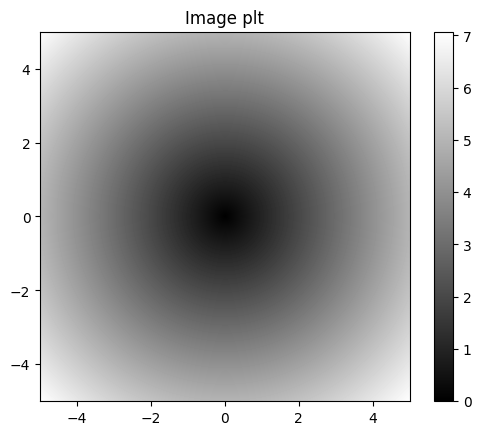

In [283]:
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plt")

#### Expressão da lógica condicional como operações com arrays

In [285]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [286]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [287]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [292]:
np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [293]:
arr = rng.standard_normal((4, 4))
arr

array([[ 8.18325622e-01, -5.71032902e-01,  7.85525063e-04,
        -1.06364272e+00],
       [ 1.30171450e+00,  7.47872942e-01,  9.80875909e-01,
        -1.10418688e-01],
       [ 4.67918531e-01,  8.90607150e-01,  1.02300937e+00,
         3.12383389e-01],
       [-6.19046857e-02, -3.59479647e-01, -7.48643984e-01,
        -9.65478907e-01]])

In [294]:
arr > 0

array([[ True, False,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [False, False, False, False]])

In [295]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2, -2],
       [ 2,  2,  2, -2],
       [ 2,  2,  2,  2],
       [-2, -2, -2, -2]])

#### Métodos matemáticos e estatístico

In [298]:
arr = rng.standard_normal((5, 4))
arr

array([[-0.65350565, -0.81188688, -0.02553817,  1.15818454],
       [ 0.30052087,  0.05305665,  0.25727152,  0.03574286],
       [ 0.54723669, -1.12296158, -1.97524767, -0.42515005],
       [-1.14907382,  1.61513805, -0.15847686, -0.25287335],
       [-1.53815403,  0.28208603, -0.62361213,  1.12182226]])

In [299]:
arr.mean()

-0.1682710355359891

In [300]:
np.mean(arr)

-0.1682710355359891

In [301]:
arr.mean(axis=1)

array([-0.08318654,  0.16164798, -0.74403065,  0.01367851, -0.18946447])

In [303]:
arr.mean(axis=0)

array([-0.49859519,  0.00308645, -0.50512066,  0.32754525])

In [304]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [305]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [306]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [309]:
arr.cumsum(axis=0) # coluna

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [308]:
arr.cumsum(axis=1) # linha

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

In [312]:
arr.argmax()

8

In [316]:
arr[[0], [1]] = 120
arr

array([[  0, 120,   2],
       [  3,   4,   5],
       [  6,   7,   8]])

#### Métodos para arrays booleanos

In [318]:
arr = rng.standard_normal(100)

In [319]:
(arr > 0).sum() # numero de valores positivos

50

In [320]:
(arr <= 0).sum() # numero de valores não positivos

50

In [321]:
#### Ordenação

In [322]:
arr = rng.standard_normal(8)
arr

array([ 1.75653198,  0.86092307,  1.18127398,  0.63167017,  2.47099711,
        0.79430252,  0.53135288, -0.8293986 ])

In [323]:
arr.sort()

In [324]:
arr

array([-0.8293986 ,  0.53135288,  0.63167017,  0.79430252,  0.86092307,
        1.18127398,  1.75653198,  2.47099711])

In [325]:
arr = rng.standard_normal((5, 3))
arr

array([[-0.90930383,  0.18423593,  0.99773818],
       [ 1.11695904, -0.94400054,  0.5314067 ],
       [ 0.193346  , -1.11826358,  0.51184558],
       [-2.27056629,  0.26316355,  2.47131349],
       [-1.0198852 ,  0.01875261, -1.89426422]])

In [326]:
arr.sort(axis=0)

In [327]:
arr

array([[-2.27056629, -1.11826358, -1.89426422],
       [-1.0198852 , -0.94400054,  0.51184558],
       [-0.90930383,  0.01875261,  0.5314067 ],
       [ 0.193346  ,  0.18423593,  0.99773818],
       [ 1.11695904,  0.26316355,  2.47131349]])

In [328]:
arr.sort(axis=1)

In [329]:
arr

array([[-2.27056629, -1.89426422, -1.11826358],
       [-1.0198852 , -0.94400054,  0.51184558],
       [-0.90930383,  0.01875261,  0.5314067 ],
       [ 0.18423593,  0.193346  ,  0.99773818],
       [ 0.26316355,  1.11695904,  2.47131349]])

In [330]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
arr2

array([  5, -10,   7,   1,   0,  -3])

In [331]:
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

#### Unicidade e outras lógicas de conjuntos

In [332]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Will', 'Joe', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [333]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [334]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [335]:
np.unique(ints)

array([1, 2, 3, 4])

In [336]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [337]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])